<a href="https://colab.research.google.com/github/sevenZHQ1018/hangqi-zhang/blob/main/class3-lab3-zhangqi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
! pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define Economics: GTM(Guatemala), UMC(Upper Middle Income), WLD(World)
country_code = ["GTM", "UMC", "WLD"]

indicators = {

              'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',
              'SP.TLF.CACT.ZS': 'Labor_Part_Rate',
              'SL.UEM.TOTL.ZS': 'Unemployment_Rate',
              'SL.TLF.TOTAL.IN':'Labor_Force_Total',
              'NY.GNP.MKTP.KD':'GDP_Const',
              'FP.CPI.TOTAL.ZG':'Inflation_CPI',
              'NY.GDS.TOTAL.ZS':'Gross_Dom_Savings',
              'NE.GDI.TOTAL.ZS':'Gross_Cap_Formation',
              'NE.EXP.GNFS.ZS':'Exports_GDP',
              'NE.IMP.GNFS.ZS':'Imports_GDP',
              'GC.TAX.TOTAL.GD.ZS':'Ttax_Rev_GDP',
              'NE.CON.GOVT.ZS':'Gov_Exp_GDP',

}

In [21]:
# 1. Fetch Data
print('Fetching data...')
df_raw = wb.data.DataFrame(indicators, economy=country_code, time=range(2000, 2025))
# 2. Trangpose(Flip Rows/Cols)
df = df_raw.T
# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()
# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)
# 5. Extract Guatemala for specific calculations
df_gtm = df.xs('GTM', axis=1, level=0).copy()

Fetching data...


In [22]:
# 1. Natural Rate of Unemployment (5-Year MA)
# df_gtm['Nat_Rate_Unemp'] = df_gtm['Unemployment_Rate'].rolling(window=5).mean()
# 2. Productivity (Output per Worker)
# df_gtm['Productivity'] = df_gtm['GDP_Const'] / df_gtm['Labor_Force_Total']
# 3. Net Capital Outflow (Exports - Imports)
df_gtm['NCO'] = df_gtm['Exports_GDP'] - df_gtm['Imports_GDP']
# 4. Budget Balance (Tax - Spending)
# df_gtm['Budget_Balance'] = df_gtm['Ttax_Rev_GDP'] - df_gtm['Gov_Exp_GDP']

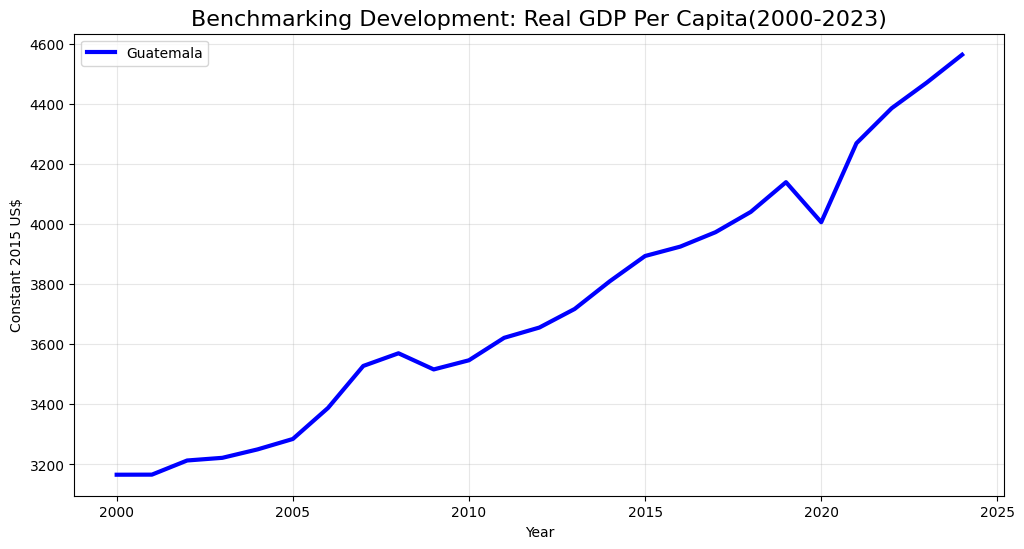

In [23]:
plt.figure(figsize=(12, 6))
# Plot ONLY Guatemala
plt.plot(df.index, df[('GTM','GDP_Per_Capita_Const')], label='Guatemala', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita(2000-2023)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Constant 2015 US$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

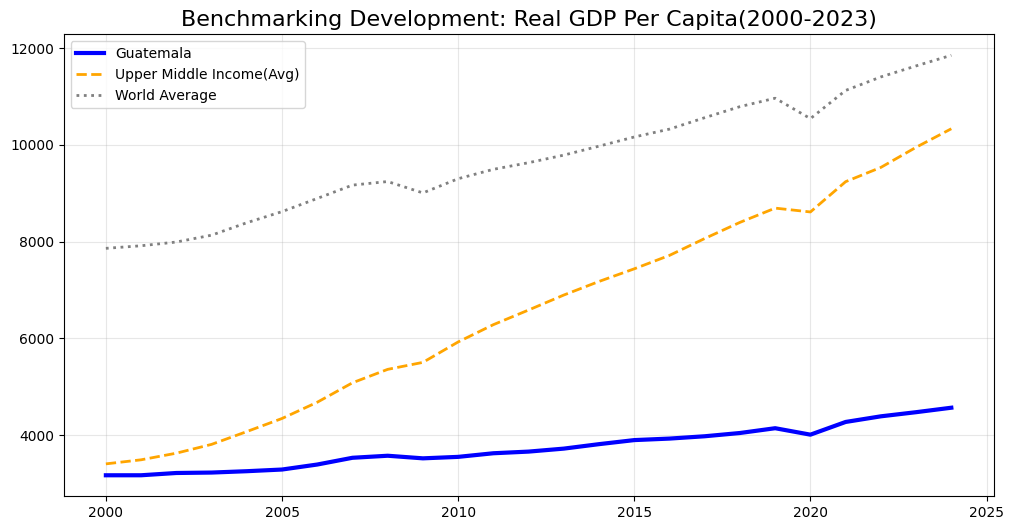

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('GTM','GDP_Per_Capita_Const')], label='Guatemala', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('UMC','GDP_Per_Capita_Const')], label='Upper Middle Income(Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD','GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita(2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


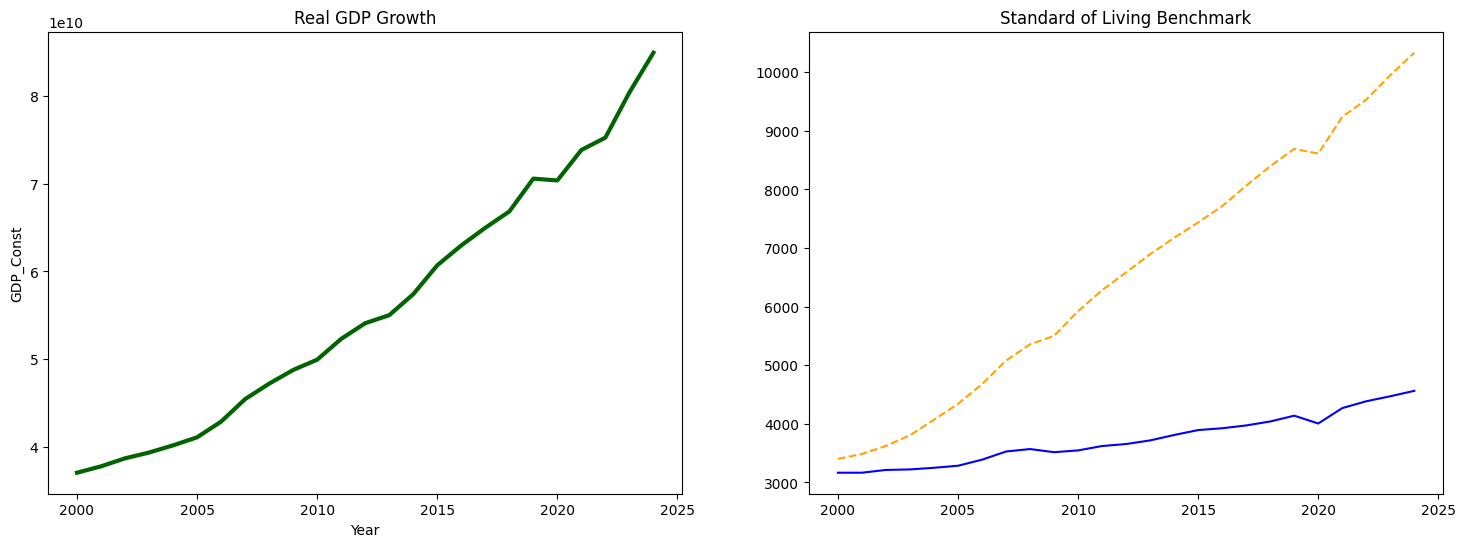

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_gtm, x=df_gtm.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('GTM', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

KeyError: 'Labor_Part_Rate'

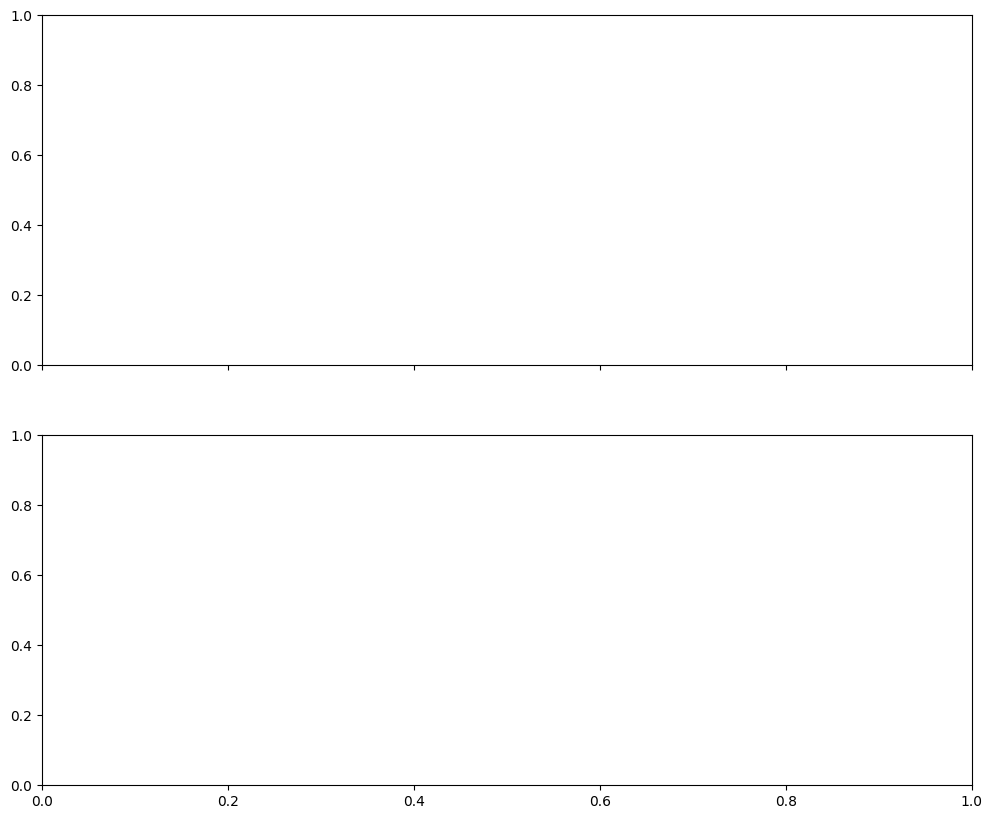

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_gtm.index, df_gtm['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_gtm.index, df_gtm['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

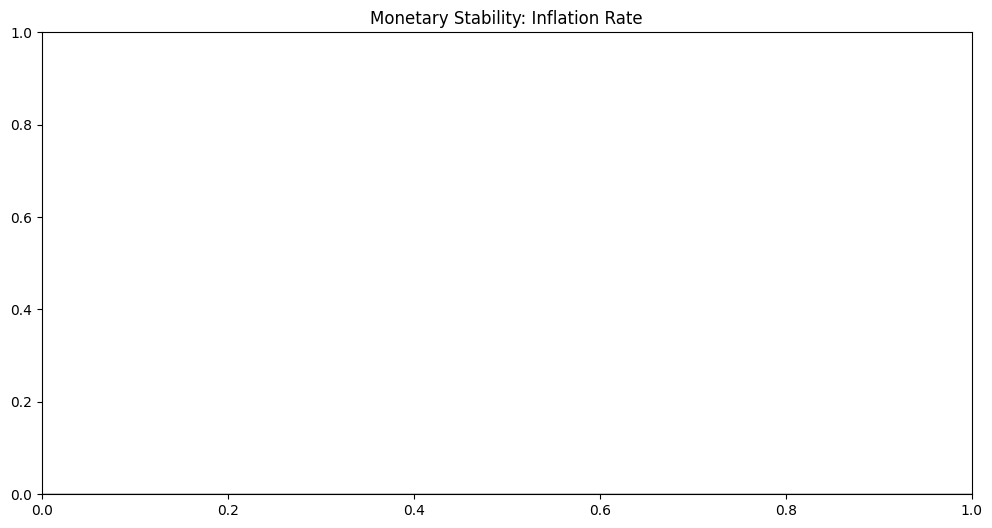

In [30]:
plt.figure(figsize=(12, 6))

# plt.bar(df_gtm.index, df_gtm['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(df_gtm.index, df_gtm['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_gtm.index, df_gtm['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

KeyError: 'Gross_Dom_Savings'

<Figure size 1200x600 with 0 Axes>

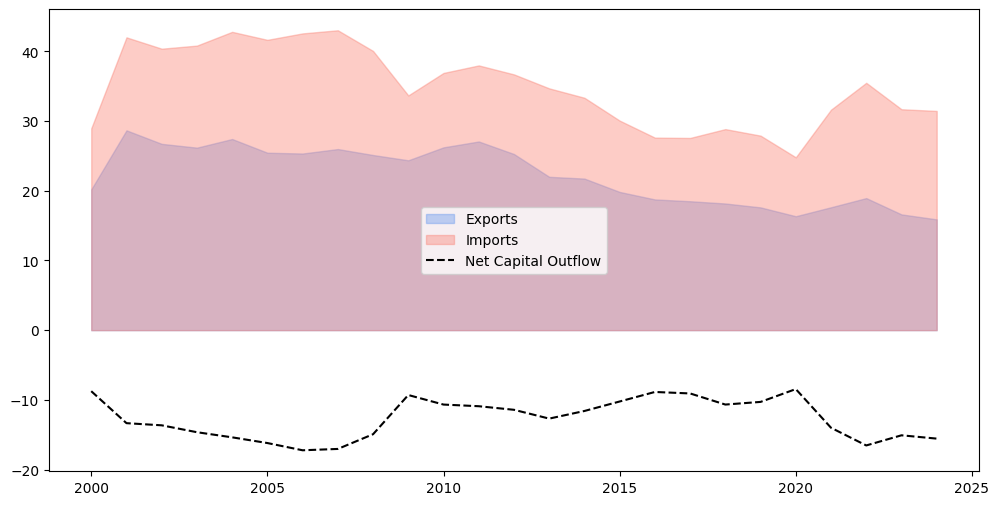

In [33]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_gtm.index, df_gtm['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_gtm.index, df_gtm['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_gtm.index, df_gtm['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

In [35]:
plt.figure(figsize=(12, 6))
# plt.plot(df_gtm.index, df_gtm['Tax_Rev_GDP'], label='Revenue', color='teal')
# plt.plot(df_gtm.index, df_gtm['Gov_Exp_GDP'], label='Expenditure', color='maroon')
# plt.fill_between(df_gtm.index, df_gtm['Tax_Rev_GDP'], df_gtm['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

<Figure size 1200x600 with 0 Axes>